In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load dataset
df = pd.read_csv("data_before_forest.csv")

# Drop unnecessary columns
df = df.drop(columns=["appid", "n_owners", "average_forever"])

# Convert the categorical target variable "owners" into a numerical format
df["owners"] = df["owners"].astype("category").cat.codes  # Assigns a unique integer to each category

# Separate features (X) and target (y)
X = df.drop(columns=["owners"])
y = df["owners"]

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_split=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=500,
                       random_state=42)

Accuracy: 0.7439

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.89      7281
           1       0.30      0.13      0.18       369
           2       0.28      0.18      0.22       502
           3       0.28      0.19      0.23       725
           4       0.27      0.11      0.16      1236

    accuracy                           0.74     10113
   macro avg       0.39      0.32      0.34     10113
weighted avg       0.67      0.74      0.70     10113



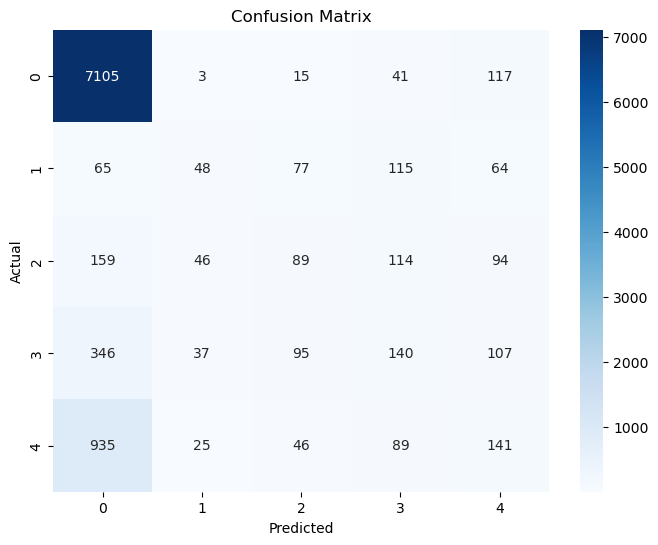

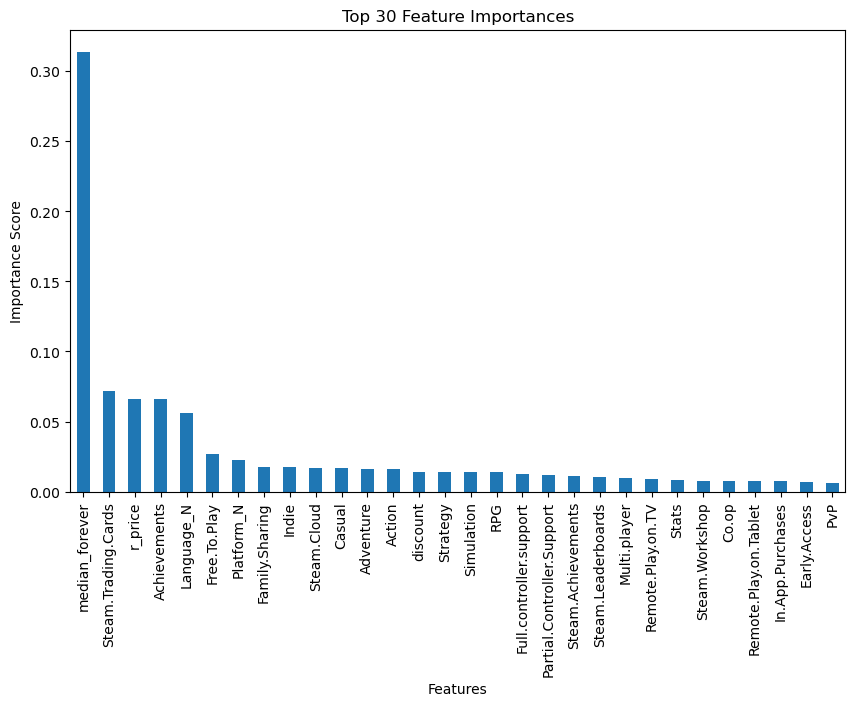

In [18]:
# Predict on test set
y_pred = rf.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

# Display confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance Plot
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importances[:30].plot(kind="bar")
plt.title("Top 30 Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


In [ ]:
def plot_feature_importance(n, filename):
    plt.figure(figsize=(12,6))
    feature_importances[:n].plot(kind="bar")
    plt.title(f"Top {n} Feature Importances")
    plt.xlabel("Features")
    plt.ylabel("Importance Score")
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    # Save the plot as a PNG file
    plt.savefig(filename, dpi=300)
    print(f"Saved: {filename}")
    plt.close()

# Compute feature importance scores
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot and save feature importance graphs
plot_feature_importance(15, "feature_importance_top15.png")
plot_feature_importance(30, "feature_importance_top30.png")
plot_feature_importance(40, "feature_importance_top40.png")

Saved: feature_noplaytime_top15.png
Saved: feature_noplaytime_top30.png
Saved: feature_noplaytime_top40.png
